# Kỹ thuật Grid Search trong Hyperparameter Tuning cho mô hình phân lớp với giải thuật K-nearest neighbors

## Xây dựng chương trình dự báo bệnh tim dựa trên các chỉ số xét nghiệm y khoa

- age: Tuổi của bệnh nhân (đơn vị năm).
- sex: Giới tính của bệnh nhân.
- cp: Loại cơn đau ngực của bệnh nhân (điều này có thể liên quan đến các vấn đề tim mạch).
    - 0: Không có đau ngực
    - 1: Đau ngực nhẹ
    - 2: Đau ngực vừa phải
    - 3: Đau ngực nghiêm trọng
- trestbps: Huyết áp khi nghỉ ngơi (đơn vị mmHg).
- chol: Mức cholesterol trong máu (đơn vị mg/dL).
- fbs: Liệu bệnh nhân có đường huyết lúc đói trên 120 mg/dL hay không.
    - 1: Có
    - 0: Không
- restecg: Kết quả điện tâm đồ khi nghỉ ngơi.
    - 0: Bình thường
    - 1: Có sóng ST-T bất thường
    - 2: Cơn nhịp tim thất
- thalach: Tốc độ nhịp tim tối đa mà bệnh nhân đạt được trong khi hoạt động.
- exang: Liệu bệnh nhân có cơn đau ngực do gắng sức hay không.
    - 1: Có
    - 0: Không
- oldpeak: Thay đổi đoạn ST do hoạt động thể chất so với khi nghỉ ngơi.
- slope: Dốc của đoạn ST đạt được sau gắng sức.
    - 1: Dốc lên
    - 2: Dốc phẳng
    - 3: Dốc xuống
- ca: Số lượng mạch vành bị tắc nghẽn.
- thal: Tình trạng của thalassemia (một bệnh lý liên quan đến máu).
    - 3: Bình thường
    - 6: Bệnh thalassemia loại thalassemia
    - 7: Không rõ
- target: Đây là mục tiêu của phân loại:
    - 1: Bệnh nhân có bệnh tim mạch
    - 0: Bệnh nhân không có bệnh tim mạch


### 1. import thư viện

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. load dữ liệu

In [56]:
df = pd.read_csv('data/heart.csv')

In [57]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### 3. Tiến hành phân tích EDA các cột dữ liệu input

In [59]:
# 3.1 Hiển thị cách đánh index của dữ liệu
df.index

RangeIndex(start=0, stop=303, step=1)

In [60]:
# 3.2 Danh sách các cột input
columns_eda = df.columns
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

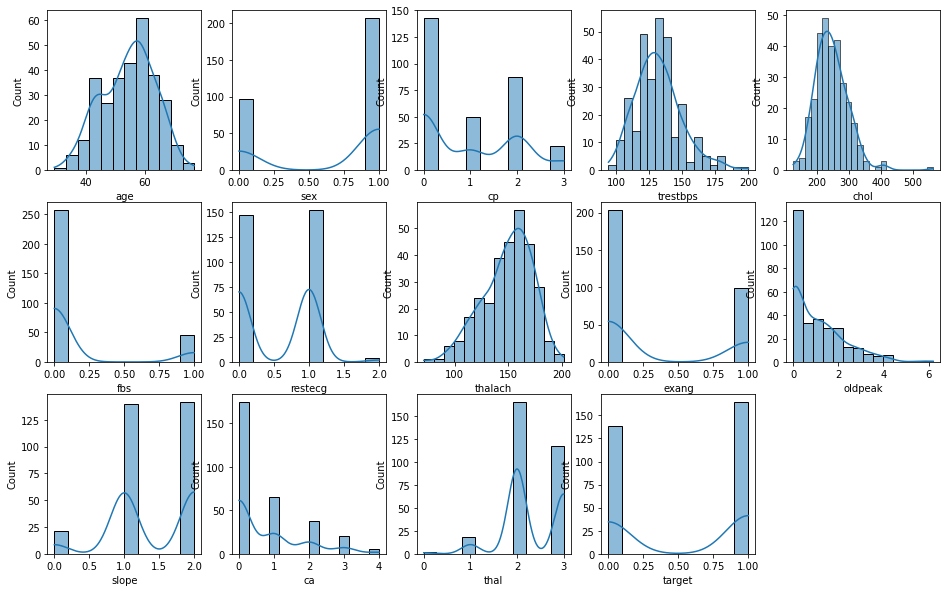

In [61]:
# 3.3 Phân tích phân phối các biến số input

fig = plt.figure(figsize=(16, 10))

for i in range(len(columns_eda)):
    colname = columns_eda[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sns.histplot(data=df, x=colname, kde=True)

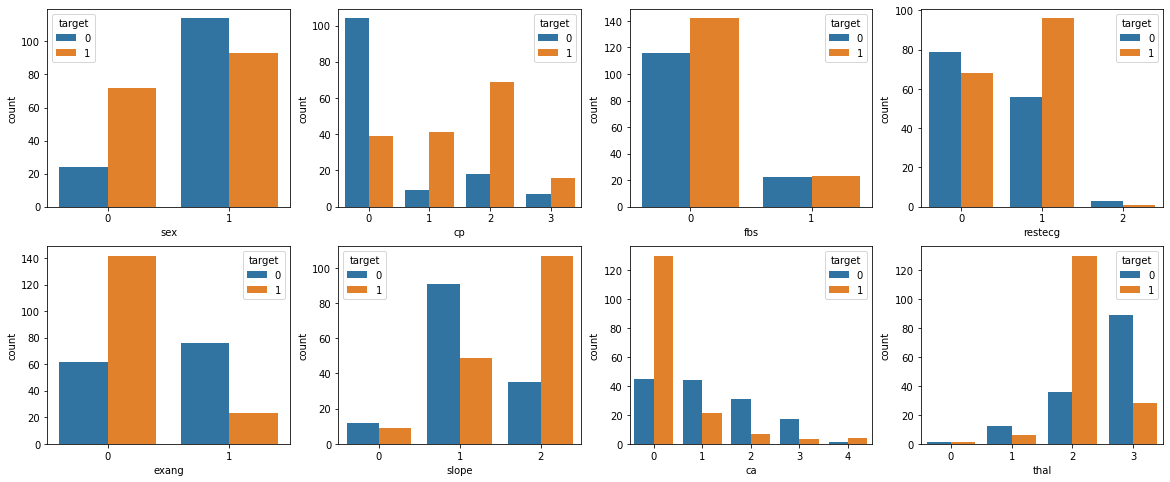

In [62]:
# 3.4 Đếm xem số lượng biến input (nhóm định tính) theo biến mục tiêu (target)

categories_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(20, 8))

for i in range(len(categories_list)):
    colname = categories_list[i]
    sub = fig.add_subplot(2, 4, i + 1)
    sns.countplot(data=df, x=colname, hue='target')

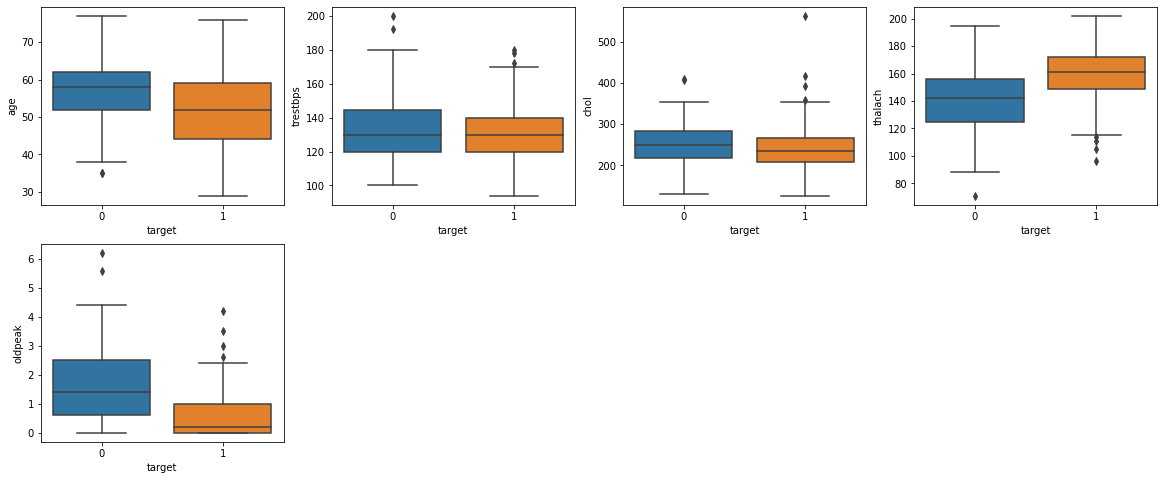

In [63]:
# 3.5 Phân tích biểu đồ box-plot các biến input (nhóm định lượng) theo biến mục tiêu
numeric_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize=(20, 8))

for i in range(len(numeric_list)):
    colname = numeric_list[i]
    sub = fig.add_subplot(2, 4, i + 1)
    sns.boxplot(data=df, y=colname, x='target')

### 4. Xây dựng mô hình

In [64]:
# 4.1 Xây dựng mô hình
X = df.iloc[:, :-1].values
y = df[['target']].values
X = X.astype(float)
y = y.astype(float)

In [65]:
# 4.2 Phân chia tập dữ liệu thành 2 phần train và test tỉ lệ 80:20 và hệ số random là 42
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, df.index, test_size=0.2, random_state=42)

In [66]:
# 4.3 Hiển thị danh sách 5 dòng cuối trong tập X_test và y_test
print(X_test[0:5])
print(y_test[0:5])

[[5.70e+01 1.00e+00 0.00e+00 1.50e+02 2.76e+02 0.00e+00 0.00e+00 1.12e+02
  1.00e+00 6.00e-01 1.00e+00 1.00e+00 1.00e+00]
 [5.90e+01 1.00e+00 3.00e+00 1.70e+02 2.88e+02 0.00e+00 0.00e+00 1.59e+02
  0.00e+00 2.00e-01 1.00e+00 0.00e+00 3.00e+00]
 [5.70e+01 1.00e+00 2.00e+00 1.50e+02 1.26e+02 1.00e+00 1.00e+00 1.73e+02
  0.00e+00 2.00e-01 2.00e+00 1.00e+00 3.00e+00]
 [5.60e+01 0.00e+00 0.00e+00 1.34e+02 4.09e+02 0.00e+00 0.00e+00 1.50e+02
  1.00e+00 1.90e+00 1.00e+00 2.00e+00 3.00e+00]
 [7.10e+01 0.00e+00 2.00e+00 1.10e+02 2.65e+02 1.00e+00 0.00e+00 1.30e+02
  0.00e+00 0.00e+00 2.00e+00 1.00e+00 2.00e+00]]
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]]


In [67]:
# 4.4 Hiển thị danh sách index của các sample trong tập X_train, X_test
print(indices_train)
print(indices_test)

Int64Index([132, 202, 196,  75, 176,  59,  93,   6, 177,  30,
            ...
             87, 214, 121, 302,  20, 188,  71, 106, 270, 102],
           dtype='int64', length=242)
Int64Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45,
            175, 118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283,
            254,  73, 231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,
             57,  92,  77, 137, 116,   7, 251, 281,  78, 292, 232, 219, 255,
             63,  82, 236, 204, 249, 104, 300, 193, 184],
           dtype='int64')


In [68]:
# 4.5 Huấn luyện mô hình
knnModel = KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='minkowski')

knnModel.fit(X_train, y_train)

<ipython-input-68-8b4090ba6cec>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnModel.fit(X_train, y_train)


KNeighborsClassifier(algorithm='brute')

In [69]:
# 4.5 Đánh giá mô hình trên tập dữ liệu train và test bằng độ đo accurancy

print(knnModel.score(X_train, y_train))
print(knnModel.score(X_test, y_test))

0.7603305785123967
0.6885245901639344


# 5. Hyperparameter tunning model with Grid Search
## - Sử dụng dộ đo đánh giá accuracy trên tập train và test để so sánh
## - Trả lời câu hỏi lựa chọn K bao nhiêu là tốt nhất cho mô hình K-NN

- n_neighbors: Number of neighbors to use, default is 5
- algorithm: algorithm used to compute the nearest neighbors, default is "auto", list of algorithm: ["ball_tree", "kd_tree", "brute", "auto"]
- metric: Metric to use for distance computation, default is "minkowski", list of algorithm: ["euclidean", "manhatan", "minkowski"]

Number of candidates: 20
0/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2} 0.8099173553719008 0.639344262295082
1/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3} 0.7727272727272727 0.6557377049180327
2/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 4} 0.743801652892562 0.6721311475409836
3/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 5} 0.7603305785123967 0.6885245901639344
4/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 6} 0.7520661157024794 0.7213114754098361
5/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 2} 0.8099173553719008 0.639344262295082
6/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 3} 0.7727272727272727 0.6557377049180327
7/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 4} 0.743801652892562 0.6721311475409836
8/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 5} 

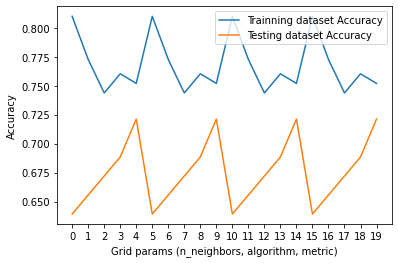

In [70]:
# 5.1 Sử dụng grid-search với nhiều hyper-parameter

from sklearn.model_selection import ParameterGrid

estimator = KNeighborsClassifier()

param_grid = {'n_neighbors': range (2,7), 'algorithm': ["ball_tree", "kd_tree"], 'metric': ["euclidean","minkowski"]}

param_candidates = ParameterGrid(param_grid)

print (f'Number of candidates: {len(param_candidates)}')

results = []

for i, params in enumerate(param_candidates):
    model = estimator.set_params(**params)
    model.fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    results.append([params, score_train, score_test])
    print(f'{i}/{len(param_candidates)-1}: ', params, score_train, score_test)

print(results)
print(f'Max score on train: {max(results, key=lambda x: x[1])}')
print(f'Max score on test: {max(results, key=lambda x: x[2])}')

list_index_on_results = range(len(results))

list_score_on_train = [x[1] for x in results]

print(list_score_on_train)

list_score_on_test = [x[2] for x in results]

print(list_score_on_test)

# Generate plot

# plt.figure(figsize=(50, 20))
plt.plot(list_index_on_results, list_score_on_train, label = 'Trainning dataset Accuracy')
plt.plot(list_index_on_results, list_score_on_test, label = 'Testing dataset Accuracy')
plt.legend()
plt.xlabel('Grid params (n_neighbors, algorithm, metric)')
plt.xticks(range(len(results)), range(len(results)))
plt.ylabel('Accuracy')
plt.show()

<ipython-input-71-fe0c08a2ca06>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-71-fe0c08a2ca06>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-71-fe0c08a2ca06>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-71-fe0c08a2ca06>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-71-fe0c08a2ca06>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

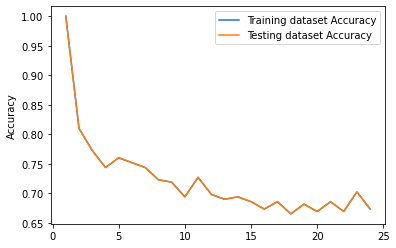

In [71]:
# 5.2 Sử dụng tham số K để dò giá trị K tốt nhất
import numpy as np
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

    print(f'k={k}, train score={train_accuracy[i]}, test_score={test_accuracy[i]}')

# generate plot
plt.plot(neighbors, train_accuracy, label="Training dataset Accuracy")
plt.plot(neighbors, train_accuracy, label="Testing dataset Accuracy")
plt.legend()
plt.ylabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### Sử dụng tham số K tốt nhất để giải quyết các yêu cầu bên dưới

In [72]:
# 6. Xây dựng mô hình với K là tốt nhất

knnModel = KNeighborsClassifier(n_neighbors=11)
knnModel.fit(X_train, y_train)

<ipython-input-72-4bd0c6bf3cbb>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnModel.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=11)

In [73]:
# 7. Hãy cho biết độ chính xác của mô hình
print(knnModel.score(X_train, y_train))
print(knnModel.score(X_test, y_test))

0.7272727272727273
0.7540983606557377


In [74]:
# 8. In ra danh sách các index của mẫu dữ liệu trong tập test
# và khoảng cách từ các hàng xóm đến các mẫu dữ liệu đó theo mô hình

distances, indices = knn.kneighbors(X_test)
print(indices)
print(distances)

[[  1  79 161 ...  78 168 141]
 [179 101  89 ... 234   5 153]
 [195 148 147 ... 154  76  95]
 ...
 [ 51  98  35 ... 229 159  16]
 [167   7  70 ... 153 185   5]
 [ 67 168 137 ... 202 187   1]]
[[ 6.63626401 17.93906352 18.22882333 ... 41.69124608 41.69124608
  41.84602729]
 [20.96759404 21.51650529 26.15415837 ... 43.04695111 44.7888379
  45.71695528]
 [46.55276576 46.92589903 53.2169146  ... 71.7147823  74.28923206
  75.0269285 ]
 ...
 [ 9.50578771 18.73926359 20.66010649 ... 31.94620478 32.22669701
  33.00666599]
 [12.9938447  17.78341924 18.62793601 ... 31.19038313 31.27299154
  32.26205201]
 [13.66601624 14.57943757 21.25464655 ... 32.04122345 32.89133625
  32.97332255]]


In [75]:
# Cho biết sample input đầu tiên trong tập test sẽ lần lượt gần K (hàng xóm) dòng nào trong tập train tính theo index và khoảng cách tương đương theo độ đo Euclidean là bao nhiêu?

print(indices[0])
print(distances[0])

[  1  79 161 222 211  25 217 166 103 111  88 192 137 138  86  69  70  67
 187  62 167  78 168 141]
[ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117 33.29804799
 33.9316961  34.9450998  35.84633873 36.37526632 38.00052631 38.12033578
 39.05176052 41.30375286 41.33231182 41.69124608 41.69124608 41.84602729]


In [76]:
# 10. Cho biết với một sample input tương ứng
# ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
# = [47,0,0,150,250,0,1,140,1,0.5,1,0,2]
# thì sẽ gần k hàng xóm nào trong tập huấn luyện,
# với tương ứng lần lượt khoảng cách là bao nhiêu và cho biết giá trị Age của hàng xóm gần nhất.

tdistances, tindices = knn.kneighbors([[47,0,0,150,250,0,1,140,1,0.5,1,0,2]])

print(tindices)
print(tdistances)


[[168   2 180  11  94  62 172 213  67  66 189 187  33 124 233 204   3 103
  125  70 192  14 197  26]]
[[16.1322658  20.65453945 21.38340478 21.39649504 22.11537926 23.02194605
  23.09567059 23.23790008 23.89748941 24.4705946  24.58149711 25.35764185
  25.95168588 26.23432866 26.97202254 27.02313823 27.08892763 27.28167883
  27.43009296 27.9300913  28.27100989 28.93527259 28.96981187 29.02912331]]


In [77]:
# 11. Xem danh sách các giá trị của lớp đánh nhãn của biến output (target) nhầm xác định bệnh nhân có bệnh hay không

classes = knn.classes_
classes

array([0., 1.])

In [78]:
# 12. Xem danh sách xác suất tiên đoán của các mẫu dữ liệu tập test theo các nhãn đầu ra
y_test_score = knn.predict_proba(X_test)
y_test_score


array([[0.70833333, 0.29166667],
       [0.41666667, 0.58333333],
       [0.33333333, 0.66666667],
       [0.54166667, 0.45833333],
       [0.66666667, 0.33333333],
       [0.25      , 0.75      ],
       [0.41666667, 0.58333333],
       [0.54166667, 0.45833333],
       [0.75      , 0.25      ],
       [0.45833333, 0.54166667],
       [0.54166667, 0.45833333],
       [0.41666667, 0.58333333],
       [0.375     , 0.625     ],
       [0.58333333, 0.41666667],
       [0.16666667, 0.83333333],
       [0.20833333, 0.79166667],
       [0.16666667, 0.83333333],
       [0.58333333, 0.41666667],
       [0.66666667, 0.33333333],
       [0.58333333, 0.41666667],
       [0.375     , 0.625     ],
       [0.83333333, 0.16666667],
       [0.70833333, 0.29166667],
       [0.45833333, 0.54166667],
       [0.58333333, 0.41666667],
       [0.20833333, 0.79166667],
       [0.625     , 0.375     ],
       [0.25      , 0.75      ],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.

In [79]:
# 13. Cho biết mẫu input có index = 2 trong tập test
# Khi qua mô hình dự báo sẽ cho xác suất dự báo nhãn nào cao hơn và giá trị là bao nhiêu,
# còn nhãn thấp là nhãn nào có xác suất bao nhiêu

print(X_test[2])
print(y_test_score[2])


[ 57.    1.    2.  150.  126.    1.    1.  173.    0.    0.2   2.    1.
   3. ]
[0.33333333 0.66666667]


In [80]:
# 14. Liệt kê danh sách các nhãn dự báo thông qua mô hình của các mẫu dữ liệu input trong tập test.
# Hãy cho biết kết quả dự báo của mẫu input thứ 5 trong tập test sẽ được dự báo là bao nhiêu?

y_test_predicted = knn.predict(X_test)
y_test_predicted


array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0.])

In [81]:
# 15. Hãy cho biết nếu điều chỉnh ngưỡng xác suất (threshold) đưa ra quyết định là 0.65
# thì kết quả dự báo của mẫu input số hai và mẫu số năm và mẫu số sáu là bao nhiêu

y_pred_test_new_065 = (knn.predict_proba(X_test)[:, 1] >= 0.65).astype(float)
y_pred_test_new_065


array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [82]:
# 16. Hãy đánh giá mô hình trên tập test qua Confusion Matrix
from sklearn.metrics import confusion_matrix

cfmx = confusion_matrix(y_test, y_test_predicted)
print(cfmx)

tn, fp, fn, tp = confusion_matrix(y_test, y_test_predicted).ravel()
print(f'{tn}, {fp}, {fn}, {tp}')


[[20  9]
 [ 8 24]]
20, 9, 8, 24


In [83]:
# #17. Giá trị quan trọng nhất trong bài toán dự báo bệnh (từ Confusion Matrix)
# Thường là FN (False Negative): bỏ sót người bệnh (dự đoán “không bệnh” nhưng thực tế “có bệnh”). Vì lý do an toàn, việc bỏ sót bệnh nhân có thể nguy hiểm, nên giảm FN là ưu tiên hàng đầu.


# 18. Đánh giá mô hình qua Precision, Recall, F1; chỉ số quan trọng nhất
# Precision: Độ chính xác khi dự đoán “có bệnh”.
# Recall: Tỉ lệ phát hiện đúng những người thật sự có bệnh.
# F1: Trung bình điều hòa giữa Precision và Recall.
# Trong bài toán y tế, Recall (giảm FN) thường được ưu tiên hơn cả để hạn chế bỏ sót người bệnh.

In [84]:
# 19. Hãy in ra bảng báo cáo các đại lượng đánh giá theo từng nhóm giá trị nhãn đầu ra
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predicted))


              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        29
         1.0       0.73      0.75      0.74        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



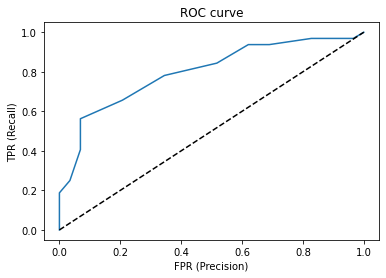

Area under curve (AUC):  0.7979525862068966


In [85]:
# 20. Đánh giá mô hình thông qua đồ thị AUC & ROC (cách đơn giản)
from sklearn.metrics import roc_curve, auc

y_score = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls='dashed', color='black')
plt.show()

print('Area under curve (AUC): ', auc(fpr, tpr))


In [86]:
# 21. Hãy in ra màn hình accuracy, confusion matrix, [tn, fp, fn, tp], [TPR, FNR, FPR, TNR], [precision, recall, F1]
# và đồ thị AUC & ROC với ngưỡng xác suất phân lớp là 0.65.
# Đưa ra kết luận khi thiết lập threshold tăng hoặc threshold giảm sẽ tác động như thế nào đến kết quả dự báo.
# Confusion matrix với threshold = 0.65

from sklearn.metrics import confusion_matrix

cfmx065 = confusion_matrix(y_test, y_pred_test_new_065)
print(cfmx065)


[[27  2]
 [16 16]]


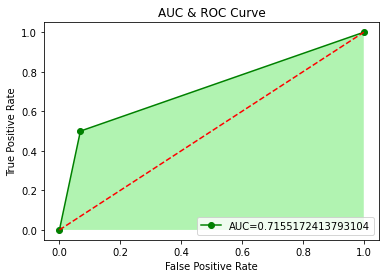

In [87]:
# AUC & ROC Curve with threshold = 0.65
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_pred_proba = (knn.predict_proba(X_test)[:, 1] >= 0.65).astype(float)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, 'go-', label='AUC='+str(auc))
plt.plot([0,1], [0,1], 'r--')
plt.title("AUC & ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()


In [88]:
# Test sample with threshold = 0.65
print('predicting sample with threshold 0.65 :')
y_pred_sample_065 = (
    knn.predict_proba([[47,0,0,150,250,0,1,140,1,0.5,1,0,2]])[:, 1] >= 0.65
).astype(float)

y_pred_sample_065


predicting sample with threshold 0.65 :


array([0.])

In [89]:
# 22. Viết chương trình dự báo bệnh tim dưới dạng Console Application,  cho phép người dùng nhập các đặc trưng đầu vào (feature input) và ngưỡng xác suất (threshold, nếu không nhập ngưỡng thì mặc định ngưỡng là 0.5). Sau đó, in ra kết quả chẩn đoán bệnh tim.

In [90]:
# Save model to file
import pickle
pickle.dump(knnModel, open('model_KNN_Heart.sav', 'wb'))

In [91]:
import pickle

# Load model từ storage
loaded_model = pickle.load(open('model_KNN_Heart.sav', 'rb'))

# AI Console application to predict heart break
# 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'
# example: 49,1,1,120,250,0,1,180,0,0.5,2,0,2

v1 = float(input('age: '))
v2 = float(input('sex: '))
v3 = float(input('cp: '))
v4 = float(input('tres: '))
v5 = float(input('chol: '))
v6 = float(input('fbs: '))
v7 = float(input('rest: '))
v8 = float(input('thala: '))
v9 = float(input('exa: '))
v10 = float(input('old: '))
v11 = float(input('slop: '))
v12 = float(input('ca: '))
v13 = float(input('thal: '))

y_pred = loaded_model.predict([[v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13]])

print('Kết quả dự báo bệnh tim: '+ str(y_pred[0]))

if(y_pred[0] == 1):
    print("Bị bệnh tim")
else:
    print('Không bị bệnh')

Kết quả dự báo bệnh tim: 1.0
Bị bệnh tim
